# Get Kaggle dataset

Upload kaggle.json

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"artemkramov","key":"e23e079bd58bf2b260208ca8c5d2d64c"}'}

Copy the JSON file, set permissions, show the list of Kaggle datasets to ensure that the `kaggle` command is working

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                       Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          14023        447  1.0              
joebeachcapital/students-performance                          Students Performance                            2KB  2023-08-31 00:50:11           4866        130  1.0              
iamsouravbanerjee/airline-dataset                             Airline Dataset                                 8MB  2023-09-13 06:47:17           5333        121  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target     Zzzs: Lightweight training dataset + t

Download the dataset and unzip it

In [ ]:
!kaggle competitions download -c airbus-ship-detection

100% 28.6G/28.6G [04:03<00:00, 138MB/s]
100% 28.6G/28.6G [04:03<00:00, 126MB/s]


In [ ]:
!unzip airbus-ship-detection.zip -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/train_v2/f9775b70e.jpg  
  inflating: /content/train_v2/f977a470c.jpg  
  inflating: /content/train_v2/f9780bfaf.jpg  
  inflating: /content/train_v2/f9782bdfe.jpg  
  inflating: /content/train_v2/f9785ca49.jpg  
  inflating: /content/train_v2/f9785e462.jpg  
  inflating: /content/train_v2/f97a719d5.jpg  
  inflating: /content/train_v2/f97afa376.jpg  
  inflating: /content/train_v2/f97b85e3e.jpg  
  inflating: /content/train_v2/f97bd0b11.jpg  
  inflating: /content/train_v2/f97bd6b80.jpg  
  inflating: /content/train_v2/f97bfb1b2.jpg  
  inflating: /content/train_v2/f97c8cbbe.jpg  
  inflating: /content/train_v2/f97cdd397.jpg  
  inflating: /content/train_v2/f97d92e1e.jpg  
  inflating: /content/train_v2/f97da9e70.jpg  
  inflating: /content/train_v2/f97e843d3.jpg  
  inflating: /content/train_v2/f97e961f2.jpg  
  inflating: /content/train_v2/f97e96c68.jpg  
  inflating: /content/train_v2/f97f63ae1.jpg  
  inflati

In [ ]:
!rm airbus-ship-detection.zip

In [ ]:
import os

print("Number of files in the training folder: {}".format(len(os.listdir("train_v2"))))

Number of files in the training folder: 192556


# Install dependencies and import them

In [ ]:
!pip install -q mediapy
!pip install albumentations
!pip install datasets
!pip install transformers
!pip install wandb
!pip install -q evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [ ]:
from os.path import join
import mediapy as media
import os
import tqdm
import pandas as pd
import numpy as np
import albumentations as A
from datasets import Dataset, IterableDataset
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from transformers import MaskFormerImageProcessor, MaskFormerForInstanceSegmentation
import torch
from torch.utils.data import DataLoader
import evaluate
import wandb

## Set global variables

Init the wandb object to track the learning process of the model

In [ ]:
# Login to our WANDB project
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Set project metadata
wandb.init(project="Airbus Maskformer",
           config={
               "dataset": "Airbus challenge",
           })

wandb: Currently logged in as: artemkramovphd. Use `wandb login --relogin` to force relogin


Set gloval variables to work with later

In [ ]:
BASE_DIR = "/content"
TRAINING_DIR = join(BASE_DIR, "train_v2")
TRAINING_DATASET = join(BASE_DIR, "train_ship_segmentations_v2.csv")
MODEL_PATH = "/content/drive/MyDrive/Airbus/checkpoints"
WIDTH = 768
HEIGHT = 768
NUM_CHANNELS = 3

# Util functions to process dataset records

In [ ]:
def get_pixels_list_from_rle(rle):
  """
  Get the list of selected pixels from the RLE string
  :param str rle: RLE string to be processed
  :return: List of indices of pixels that corresponded to the RLE string
  :rtype: List[int]
  """
  pixels = []
  if rle != '':

    # Split the string by a space symbol
    elements = rle.split(' ')

    # Process pairs (start pixel, number of pixels) therefore
    # we are moving with the size step 2
    for i in range(0, len(elements), 2):
      start = int(elements[i])
      offset = int(elements[i + 1])
      end = start + offset
      pixels.extend(list(range(start, end)))
  return pixels

def get_mask_from_rle(rle, width=WIDTH, height=HEIGHT):
  """
  Get binary segmentation map (mask) from the provided RLE string
  :param str rle: RLE string
  :param int width: width of an output map in pixels
  :param int height: height of an output map in pixels
  :return: binary segmentation map (mask) where 1 represents the part of the ship, 0 is a background pixel
  :rtype: np.ndarray
  """

  # Init output map with zeros as a flattened array
  segmentation_map = np.zeros((width * height), dtype=np.uint8)

  # Get the list of pixels that correspond to ships and fill corresponding
  # map positions
  pixels = get_pixels_list_from_rle(rle)
  for pixel in pixels:
    segmentation_map[pixel] = 1

  # Reshape the map to the desired shape and transpose the matrix
  segmentation_map = segmentation_map.reshape((width, height)).T
  return segmentation_map

def get_mask_for_image(image_idx):
  """
  Given the ID of the image, the function returns the binary segmentation map (mask)
  :param str image_idx: ID of the image that is defined as a filename
  :return: binary segmentation map
  :rtype: np.ndarray
  """

  # Get dataset rows that correspond to the required image
  rows = df[df.ImageId == image_idx]

  # Collect all RLE strings of the image (each rle string correspond to
  # either empty image/one ship)
  rle = []
  for _, row in rows.iterrows():
    if not pd.isna(row['EncodedPixels']):
      rle.append(row['EncodedPixels'].strip())

  # Generate the segmentation map given all RLE strings
  segmentation_map = get_mask_from_rle(" ".join(rle))
  return segmentation_map

## Load training data and create a dataset from a generator

In [ ]:
df = pd.read_csv(TRAINING_DATASET)
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [ ]:
print("Number of records within the dataset: {}".format(df.shape[0]))
print("Number of unique images within the dataset: {}".format(df['ImageId'].unique().shape[0]))

Number of records within the dataset: 231723
Number of unique images within the dataset: 192556


Shuffle the dataset and split it into the training and validation sets

In [ ]:
df = shuffle(df)
df_train, df_validation = train_test_split(df, test_size=0.2)
print(df_train.shape, df_validation.shape)

(185378, 2) (46345, 2)


In [ ]:
def generator_fn(df_subset):
  """
  Generator function to return dataset samples from the images of the given subset
  :param pd.DataFrame df_subset: subset to be processed
  :return: tuple of an image and its mask
  :rtype (np.ndarray, np.ndarray) where the shape of the first array (image) is (NUM_CHANNELS, WIDTH, HEIGHT)
      and he shape of the second array (mask) is (WIDTH, HEIGHT)
  """

  # Define a number of images with/without ships, and total number of images
  # We are doing that because our dataset is imbalanced and we want to balance
  # it by augmenting images with a minority class (images with ships)
  num_empty_records = df_subset[df_subset['EncodedPixels'].isna()].shape[0]
  num_images_with_ships = df_subset[df_subset['EncodedPixels'].notna()]['ImageId'].value_counts().shape[0]
  total_number_of_images = num_empty_records + num_images_with_ships

  # List of transformations to be applied
  # It was decided to rely just on non-destructive transformations as far as
  # all images are of the same shape and quality, but maybe it is advisable to
  # add scaling transformations as well
  transformations = [
      A.HorizontalFlip(p=1),
      A.VerticalFlip(p=1),
      A.RandomRotate90(p=1),
      A.Transpose(p=1)
  ]

  # Set the current number of original samples with ships
  # and the current number if an overall samples with ships (with augmented data)
  # We add augmented data till the moment when a number of samples with images
  # to be considered is bigger than the amount of samples to be used to make
  # the dataset balanced
  current_number_of_samples_with_ships = 0
  current_number_of_samples_with_ships_wo_aug = 0

  for _, row in df_subset.iterrows():

    # Read a sample and return it's image and mask
    filename = join(TRAINING_DIR, row['ImageId'])
    image = media.read_image(filename)
    mask = get_mask_for_image(row['ImageId'])
    yield np.moveaxis(image, -1, 0), mask

    # If a sample contains a ship
    if not pd.isna(row['EncodedPixels']):
      current_number_of_samples_with_ships += 1
      current_number_of_samples_with_ships_wo_aug += 1

      # Iterate over transformations
      # We apply a transformation if an amount of not considered images of ships
      # is less than a difference between a number of images withouts ships and
      # a number of all images with ships (with augmented data)
      for aug in transformations:
        if num_images_with_ships - current_number_of_samples_with_ships_wo_aug >= num_empty_records - current_number_of_samples_with_ships:
          break

        # Apply augmentation and return a new sample
        augmented = aug(image=image, mask=mask)
        current_number_of_samples_with_ships += 1
        yield np.moveaxis(augmented['image'], -1, 0), augmented['mask']



In [ ]:
# Define the training and validatopn dataset
# We cut the validation set according to computational cost (takes too much time to calculate mIoU)
dataset_train = IterableDataset.from_generator(generator_fn, gen_kwargs={'df_subset': df_train})
dataset_validation = IterableDataset.from_generator(generator_fn, gen_kwargs={'df_subset': df_validation.head(1000)})

""

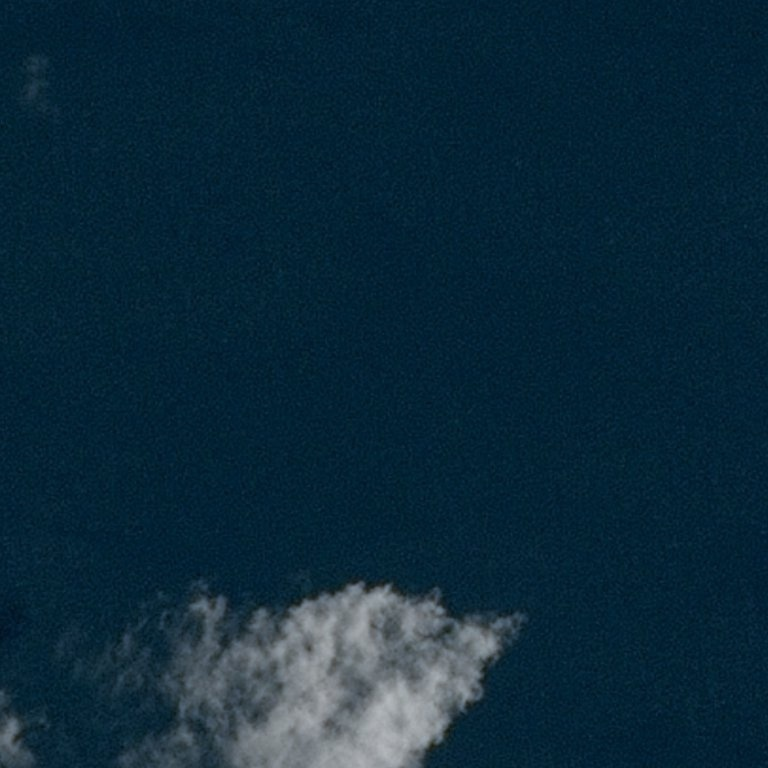

In [ ]:
# Show image from the dataset
for sample in dataset_train:
  media.show_image(np.moveaxis(sample[0], 0, -1))
  break

In [ ]:
def print_stats_for_dataset(dataset_obj):
  """
  Print statistics for the dataset: number of samples with and without ships
  It's necessary to check whether the generator returns a balanced dataset
  :param IterableDataset dataset_obj: dataset to be analyzed
  :return: None
  """
  num_samples_with_ships = 0
  num_samples_wo_ships = 0
  for sample in tqdm.tqdm(dataset_obj):
    if np.sum(sample[1]) == 0:
      num_samples_wo_ships += 1
    else:
      num_samples_with_ships += 1
  print("")
  print("Number of images with ships: {}".format(num_samples_with_ships))
  print("Number of images without ships: {}".format(num_samples_wo_ships))

In [ ]:
# print("Stats for the training set")
# print_stats_for_dataset(dataset_train)
# print("")

print("Stats for the validation set")
print_stats_for_dataset(dataset_validation)

Stats for the validation set


1290it [00:34, 37.30it/s]


Number of images with ships: 646
Number of images without ships: 644


# Prepare data collator and metadata

Set ID of pixel classes and their labels

In [ ]:
id2label = {0: 'background', 1: 'ship'}

In [ ]:
# Create a preprocessor for the MaskFormer
# The preprocessor transforms the pair "image-mask" to the list of binary masks with the corresponding classes
# We set the ignore_index to -1 as far as we want to predict the background (label=0) as well
preprocessor = MaskFormerImageProcessor(ignore_index=-1, reduce_labels=False, do_resize=False, do_rescale=False, do_normalize=False)

/usr/local/lib/python3.10/dist-packages/transformers/models/maskformer/image_processing_maskformer.py:429: FutureWarning: The `reduce_labels` argument is deprecated and will be removed in v4.27. Please use `do_reduce_labels` instead.
  warnings.warn(


In [ ]:
def collate_fn(batch):
  """
  Preprocess batch to preprocess images, group images and masks for passing to the model
  :param batch: list of tuples that is returned by the DataLoader
  :return: list of dictionaries where each key represents a batch data
  :rtype: dict
  """

  # Group images and masks
  inputs = list(zip(*batch))
  images = inputs[0]
  segmentation_maps = inputs[1]

  # This preprocessing function pads the inputs to the same size,
  # and creates a pixel mask
  batch = preprocessor(
      images,
      segmentation_maps=segmentation_maps,
      return_tensors="pt",
  )

  # Pass original segmentation masks as well
  batch['original_segmentation_maps'] = segmentation_maps

  return batch

In [ ]:
# Set training and validation dataloaders according to the preprocessing collator function and batch sizes
train_dataloader = DataLoader(dataset_train, batch_size=2, shuffle=False, collate_fn=collate_fn)
val_dataloader = DataLoader(dataset_validation, batch_size=4, shuffle=False, collate_fn=collate_fn)

Check if the collation was applied successfully: print all parameters of the batch where


*   `pixel_values` is the pixel values of an image (3, 768, 768)
*   `pixel_mask` is the mask of pixel values (always equals to 1 in our cases as far as there is no padding)
*   `mask_labels` is a list of binary masks
*   `class_labels` is a list of labels per each binary mask
*   `original_segmentation_maps` is a ground-truth binary mask



In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,v[0].shape)

pixel_values torch.Size([2, 3, 768, 768])
pixel_mask torch.Size([2, 768, 768])
mask_labels torch.Size([1, 768, 768])
class_labels torch.Size([1])
original_segmentation_maps (768, 768)


""

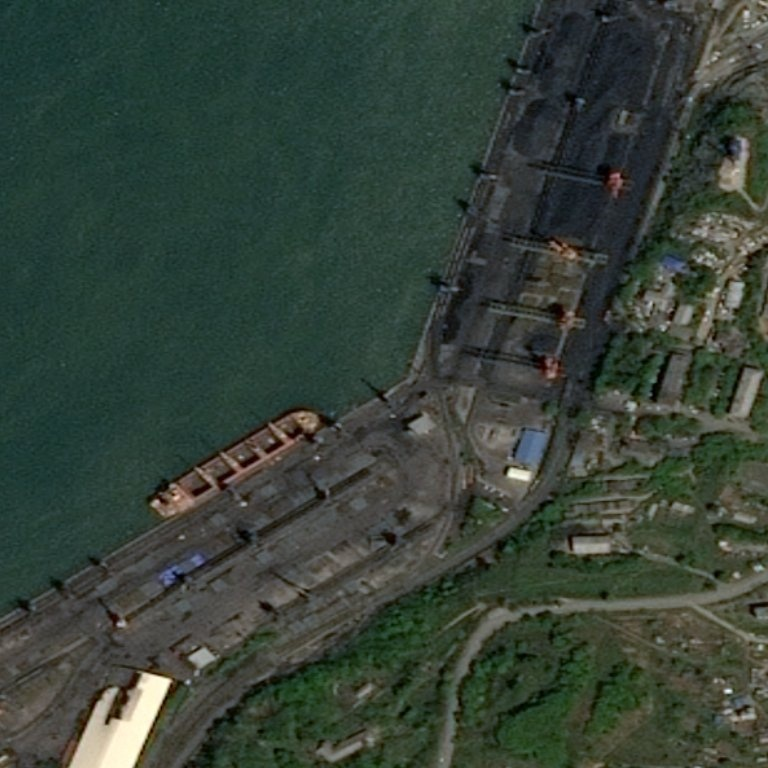

,

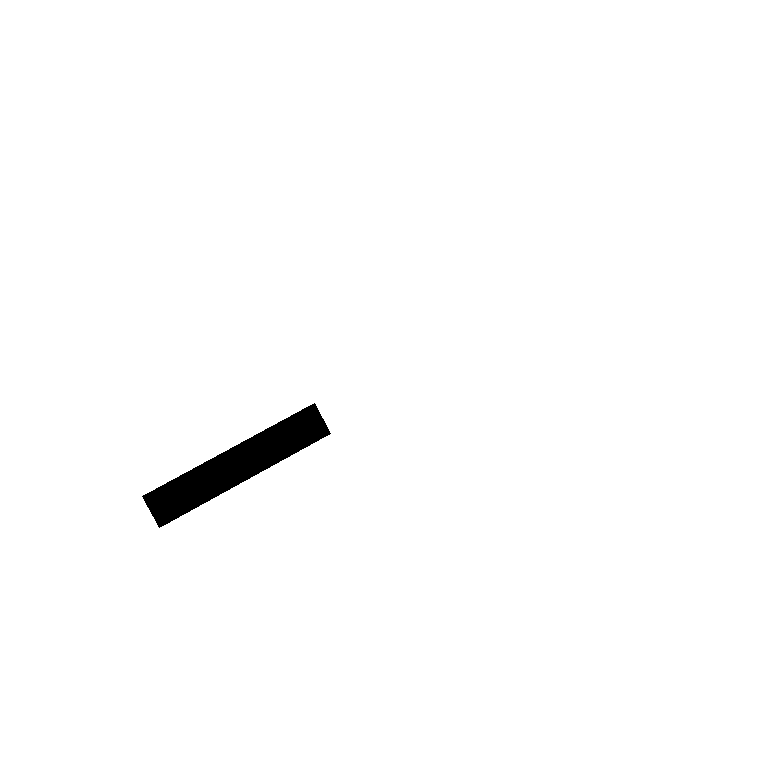
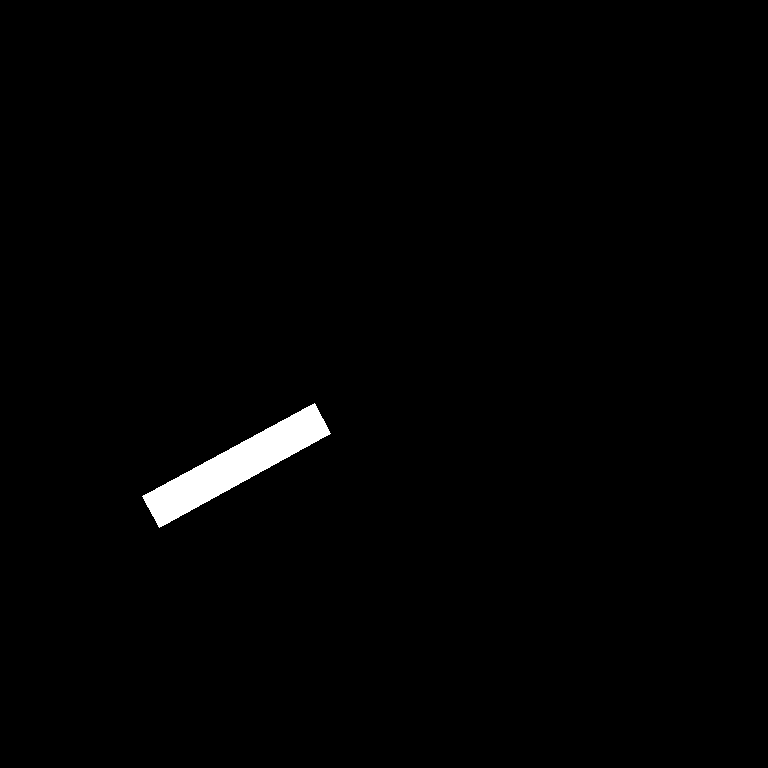

tensor([0, 1])


In [ ]:
# Print an example of the sample together with itd masks
idx = 1
pixel_values = batch["pixel_values"][idx].numpy()
pixel_values = np.moveaxis(pixel_values, 0, -1)
media.show_image(pixel_values)
mask = batch['mask_labels'][idx].numpy()
media.show_images(mask)
print(batch['class_labels'][idx])

# Define the model

In [ ]:
# Replace the head of the pre-trained model
# We are using the pre-trained model that was trained on other segmentation dataset
# in order to fine-tune it on our dataset
model = MaskFormerForInstanceSegmentation.from_pretrained("facebook/maskformer-swin-base-ade",
                                                          id2label=id2label,
                                                          ignore_mismatched_sizes=True)

# This line was used to keep training after the break of the calculation process
# model = MaskFormerForInstanceSegmentation.from_pretrained(join(MODEL_PATH, "model_0.8054"))

In [ ]:
# Get a current GPU device and attach the model to it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MaskFormerForInstanceSegmentation(
  (model): MaskFormerModel(
    (pixel_level_module): MaskFormerPixelLevelModule(
      (encoder): MaskFormerSwinBackbone(
        (model): MaskFormerSwinModel(
          (embeddings): MaskFormerSwinEmbeddings(
            (patch_embeddings): MaskFormerSwinPatchEmbeddings(
              (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
            )
            (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (encoder): MaskFormerSwinEncoder(
            (layers): ModuleList(
              (0): MaskFormerSwinStage(
                (blocks): ModuleList(
                  (0-1): 2 x MaskFormerSwinLayer(
                    (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
                    (attention): MaskFormerSwinAttention(
                      (self): MaskFormerSwinSelfAttention(
                        (query): Linear(in_

Load a metric to evaluate the quality of the model on the validation set. We are using a traditional mean IoU metric.

In [ ]:
metric = evaluate.load("mean_iou")

Set the function to calculate the evaluation score

In [ ]:
def calculate_eval_score():
  """
  Calculate the metric on the validation set
  The function prints and returns the mean IoU value
  :return: mean IoU
  :rtype: float
  """

  # Switch the model to the evaluation mode
  model.eval()

  # Iterate over batches of the validation dataloader
  for idx, batch in enumerate(tqdm.tqdm(val_dataloader)):

    # Get pixel values of images
    pixel_values = batch["pixel_values"]

    # Pass input data to the model and get output results
    with torch.no_grad():
      outputs = model(pixel_values=pixel_values.to(torch.float).to(device))

    # Get an expected size of each binary mask within the batch
    target_sizes = [(WIDTH, HEIGHT) for image in pixel_values]

    # Predict segmentation maps according to the output of the model and the
    # requested target shapes
    predicted_segmentation_maps = preprocessor.post_process_semantic_segmentation(outputs,
                                                                                  target_sizes=target_sizes)

    # Get ground truth segmentation maps from the batch
    ground_truth_segmentation_maps = batch["original_segmentation_maps"]

    # Add ground-truth and predicted binary masks for the calculation of the metric
    metric.add_batch(references=ground_truth_segmentation_maps, predictions=predicted_segmentation_maps)

    # Clear memory
    del outputs
    torch.cuda.empty_cache()

  # Compute metric results
  metric_result = metric.compute(num_labels = len(id2label), ignore_index = -1)['mean_iou']
  print("Mean IoU:", metric_result)

  # Add the value to WANDB log
  wandb.log({"val_mean_iou": metric_result})
  return metric_result

In [ ]:
# Current best value of the mean IoU
# It is used during the training to save the best models
best_mean_iou = 0

# Create an optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Global steps during the training regardless an epoch
global_steps = 0

# Move epoch by epoch
for epoch in range(10):
  print("Epoch:", epoch)

  # Init current number of samples and the training loss value
  num_samples = 0
  running_loss = 0.0

  # Set the model to the training mode
  model.train()

  # Iterate over batches of the training set
  for idx, batch in enumerate(tqdm.tqdm(train_dataloader)):

      # Reset the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(
          pixel_values=batch["pixel_values"].to(torch.float).to(device),
          mask_labels=[labels.to(device) for labels in batch["mask_labels"]],
          class_labels=[labels.to(device) for labels in batch["class_labels"]],
      )

      # Backward propagation
      # The loss function consists of 3 components:
      # - label cross-entropy loss
      # - binary mask loss
      # - dice loss
      # See MaskFormerLoss for more details:
      # https://github.com/huggingface/transformers/blob/main/src/transformers/models/maskformer/modeling_maskformer.py#L1014
      loss = outputs.loss
      loss.backward()

      # Upda the loss
      batch_size = batch["pixel_values"].size(0)
      running_loss += loss.item()
      num_samples += batch_size

      # Log the current loss value
      if (idx + 1) % 100 == 0:
        loss_value = running_loss / num_samples
        print("Loss:", loss_value)
        wandb.log({"training_loss": loss_value})

      # Optimization
      optimizer.step()

      # Clear memory
      del outputs
      torch.cuda.empty_cache()

      # Increase a global step counter
      global_steps += 1

      # Calculate the metric on the validation set
      # If new value is bigger than the previous max value
      # than save the current model
      if global_steps % 3000 == 0:
        metric_result = calculate_eval_score()
        model.train()
        if metric_result > best_mean_iou:
          best_mean_iou = metric_result
          filepath = join(MODEL_PATH, "model_{:.4f}".format(best_mean_iou))
          model.save_pretrained(filepath)

  wandb.log({"training_loss": loss_value, "epoch": epoch})

Epoch: 0


99it [03:42,  2.22s/it]

Loss: 0.10901853650226258


199it [07:22,  2.20s/it]

Loss: 0.09436363872431684


299it [11:01,  2.19s/it]

Loss: 0.10665098623081576


399it [14:40,  2.17s/it]

Loss: 0.10035239880278823


499it [18:19,  2.18s/it]

Loss: 0.09984999310679268


599it [21:59,  2.20s/it]

Loss: 0.09581948919852341


699it [25:39,  2.17s/it]

Loss: 0.09280894305644324


799it [29:18,  2.21s/it]

Loss: 0.09119911265774135


899it [32:57,  2.18s/it]

Loss: 0.09055906534004154


999it [36:35,  2.19s/it]

Loss: 0.0923461289597326


1099it [40:14,  2.18s/it]

Loss: 0.09188274949847255


1199it [43:54,  2.18s/it]

Loss: 0.09153374707577314


1299it [47:32,  2.18s/it]

Loss: 0.09393294041618132


1399it [51:11,  2.19s/it]

Loss: 0.0932700220332273


1499it [54:51,  2.20s/it]

Loss: 0.09231903929653344


1599it [58:31,  2.20s/it]

Loss: 0.09134035010616572


1699it [1:02:10,  2.19s/it]

Loss: 0.09193719554040239


1799it [1:05:49,  2.19s/it]

Loss: 0.09048150085889373


1899it [1:09:28,  2.19s/it]

Loss: 0.09238033521301603


1999it [1:13:07,  2.20s/it]

Loss: 0.09171253532398259


2099it [1:16:46,  2.17s/it]

Loss: 0.09184082250717827


2199it [1:20:25,  2.20s/it]

Loss: 0.09158014405288585


2299it [1:24:05,  2.20s/it]

Loss: 0.09175779555006201


2399it [1:27:44,  2.18s/it]

Loss: 0.09252179672697215


2499it [1:31:23,  2.19s/it]

Loss: 0.09192963854140253


2599it [1:35:03,  2.19s/it]

Loss: 0.09131985421266178


2699it [1:38:41,  2.18s/it]

Loss: 0.09180208793872023


2799it [1:42:20,  2.17s/it]

Loss: 0.09248736883634723


2899it [1:46:00,  2.21s/it]

Loss: 0.09227116716094817


2999it [1:49:39,  2.17s/it]

Loss: 0.09227775913477429



0it [00:00, ?it/s]
1it [00:07,  7.90s/it]
2it [00:15,  7.93s/it]
3it [00:23,  7.89s/it]
4it [00:31,  7.87s/it]
5it [00:39,  7.87s/it]
6it [00:47,  7.86s/it]
7it [00:55,  7.87s/it]
8it [01:03,  7.90s/it]
9it [01:11,  7.91s/it]
10it [01:19,  7.95s/it]
11it [01:27,  8.01s/it]
12it [01:35,  7.97s/it]
13it [01:42,  7.95s/it]
14it [01:50,  7.91s/it]
15it [01:58,  7.88s/it]
16it [02:06,  7.90s/it]
17it [02:14,  7.89s/it]
18it [02:22,  7.92s/it]
19it [02:30,  7.88s/it]
20it [02:38,  7.91s/it]
21it [02:46,  7.89s/it]
22it [02:53,  7.88s/it]
23it [03:01,  7.88s/it]
24it [03:09,  7.88s/it]
25it [03:17,  7.92s/it]
26it [03:25,  7.88s/it]
27it [03:33,  7.94s/it]
28it [03:41,  7.94s/it]
29it [03:49,  7.93s/it]
30it [03:57,  7.93s/it]
31it [04:05,  7.96s/it]
32it [04:13,  7.96s/it]
33it [04:21,  7.99s/it]
34it [04:29,  8.00s/it]
35it [04:37,  7.95s/it]
36it [04:45,  7.92s/it]
37it [04:52,  7.91s/it]
38it [05:00,  7.89s/it]
39it [05:08,  7.92s/it]
40it [05:16,  7.92s/it]
41it [05:24,  7.90s/it]
42it 

Mean IoU: 0.8197242861794569


3099it [2:46:20,  2.17s/it]

Loss: 0.09192920058419751


3199it [2:49:59,  2.18s/it]

Loss: 0.09185085355561114


3299it [2:53:38,  2.20s/it]

Loss: 0.09175583440389318


3399it [2:57:17,  2.18s/it]

Loss: 0.09137482292320569


3400it [2:57:20,  3.13s/it]


KeyboardInterrupt: ignored

The training was stopped when the training loss curve wasn't changed during many steps.

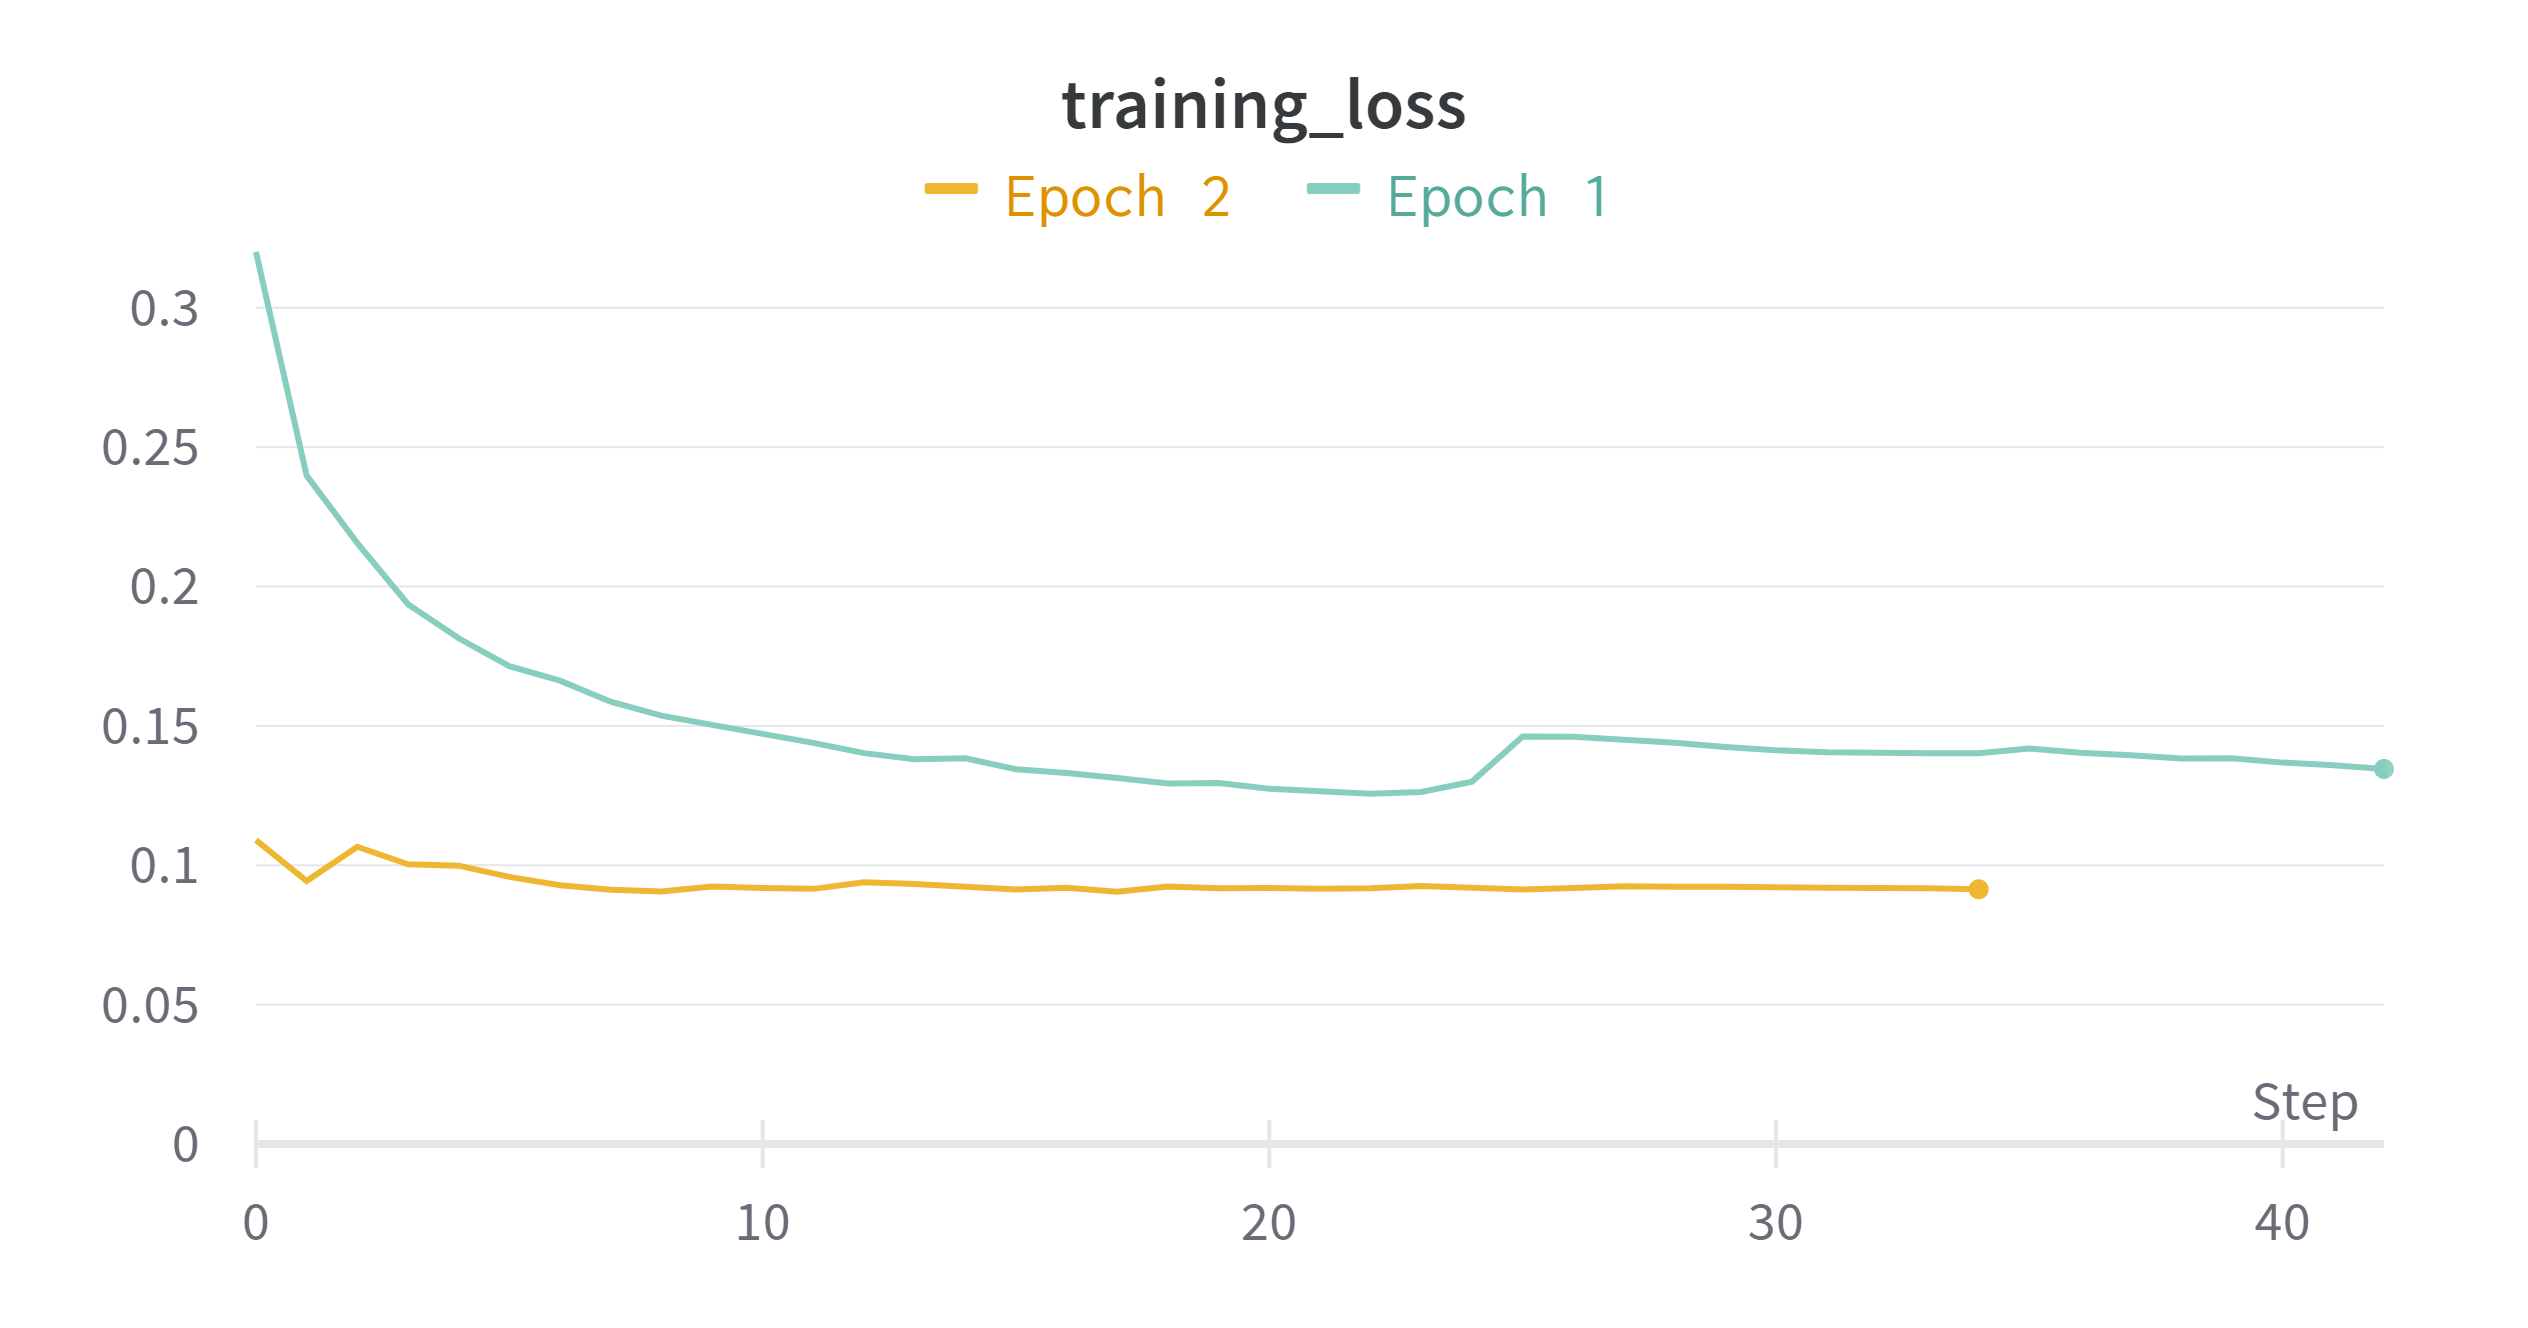

The best mean IoU value of the validation set equals to `0.8197`